In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
k_b = 1.380649e-23 #m^2 kg/s^2/K
q_e = 1.6e-19
h = 6.626176e-34
hbar = 1.054571e-34
data = []

data.extend(np.load("Magnetic-field.npy", allow_pickle=True))


In [4]:
data

[array([0.0,
        array([-0.03703704, -0.03703704, -0.03703704, -0.03703704, -0.03703704,
               -0.03703704, -0.03703704, -0.03703704, -0.03703704, -0.03703704,
               -0.03703704, -0.03703704, -0.03703704, -0.03703704, -0.03703704,
               -0.03703704, -0.03703704, -0.03703704, -0.03703704, -0.03703704,
               -0.03703704, -0.03703704, -0.03703704, -0.03703704, -0.03703704,
               -0.03703704,  0.03703704,  0.03703704, -0.03703704,  0.03703704,
                0.03703704,  0.03703704,  0.03703704,  0.03703703, -0.03703703,
                0.03703699,  0.03703677,  0.03703561,  0.03703004,  0.03700576,
               -0.03695299,  0.03690952,  0.03656328,  0.03545113, -0.03452877,
                0.03451265, -0.03402055,  0.03391579, -0.03376215,  0.03357434,
               -0.0331846 , -0.03291907,  0.03283124,  0.03257621, -0.03241419,
                0.03205341, -0.03196223,  0.03187859, -0.03159918,  0.03147383,
               -0.03088544,

500


IndexError: index 100 is out of bounds for axis 1 with size 100

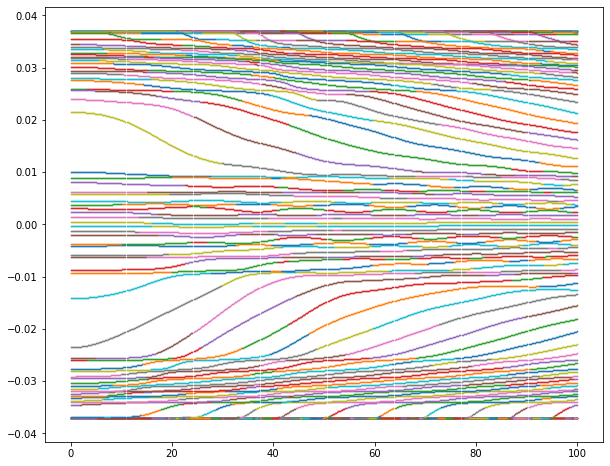

In [30]:
bs = []
evs = []
plt.figure(figsize=(10,8))
for b, energies in data:
    # en = [2.7*a for a in energies if a > 0]
    evs.append(np.array(energies))
    bs.append(b)

print(len(bs))
evs = np.array(evs)
for i, b in enumerate(bs):
    plt.scatter(bs, evs[:,i], s=.5)
# evs = np.array(evs)
# for i, ev in enumerate(evs):
#     plt.scatter(bs[i], )
plt.show()

/tmp/ipykernel_770/1106573093.py:35: RuntimeWarning: invalid value encountered in double_scalars
  height = sum([dE * c if  left < energies[i]*2.7 < right else 0 for i,c in enumerate(conductances)])/(right-left)


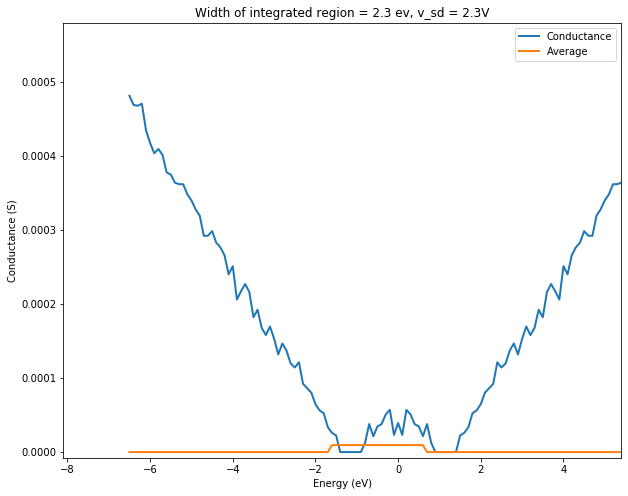

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(-3*2.7, 2*2.7), ylim=(-0.2*q_e**2/h,15*q_e**2/h))
line, = ax.plot([], [], lw=2, label="Conductance")
box, = ax.plot([],[],lw=2, label="Average")
ax.legend()
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

mid = -0.5
def animate(frame):
    current, v_sd, energies, conductances = frame
    conductances = np.array(conductances)
    energies = np.array(energies)
    conductances *= q_e**2/h
    current *= q_e**2/h
    ax.set_title("Source-drain voltage = {}V".format(round(v_sd,3)))
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel("Conductance (S)")
    line.set_data(energies*2.7, np.array(conductances))
    dE = (energies[1]-energies[0])

    max_E = -5
    for i, c in enumerate(conductances):
        if c == 0:
            max_E = energies[i]*2.7
            break


    #draw fit box
    left = mid - v_sd /2
    right = mid + v_sd/2
    height = sum([dE * c if  left < energies[i]*2.7 < right else 0 for i,c in enumerate(conductances)])/(right-left)


    ax.set_title("Width of integrated region = {} ev, v_sd = {}V"
                 .format(round(right-left,3), round(v_sd,3)))
    box_points = [(height if  left < a < right else 0) for a in energies*2.7]
    box.set_data(energies*2.7, box_points)

    return line,

frames = data
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=200, blit=True)

anim.save('bigger_picture.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()



In [77]:
np.linspace(1.04,2.3,280)[3*280//4]

1.9883870967741935

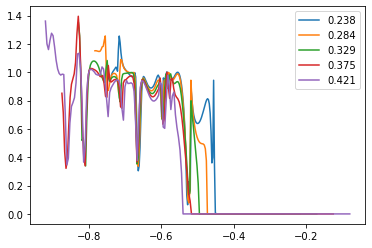

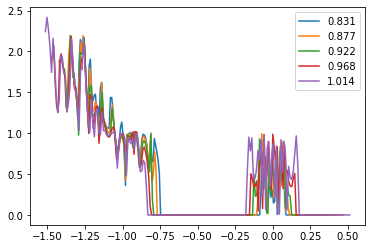

In [22]:
for current, v_sd, energies, conductances in data[50:100:10]:
    plt.plot(energies*2.7, conductances, label=round(v_sd,3))

plt.legend()
plt.show()


for current, v_sd, energies, conductances in data[180::10]:
    plt.plot(energies*2.7, conductances, label=round(v_sd,3))

plt.legend()
plt.show()